#Deep Neural Networks Assignment-2

##Part 2B: Implement the following topics demonstrated (Lab sheets) in the webinar.

##Course Code: AIMLCZG511


**Group No: 49**

**2022AC05034 - DEEPAK J BHAT**

**2022AC05061 - SUBRAT KUMAR**

**2022AC05067 - YASHODHAR C BELGAUMKAR**

**2022AC05384 - ANIRUDH KANFADE**

# 1. Deep Neural Networks and Comparative analysis of optimizer performance



**Note: The Exercise code is implemented after the implementing the code provided in lab sheets.**

In [61]:
import tensorflow as tf
import keras.models as models
import keras.layers as layers
from keras import optimizers
import random
import numpy as np

In [21]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time.
tf.random.set_seed(42)  # sets the graph-level random seed

In [22]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

Text(0.5, 1.0, 'Ground truth(test): 7')

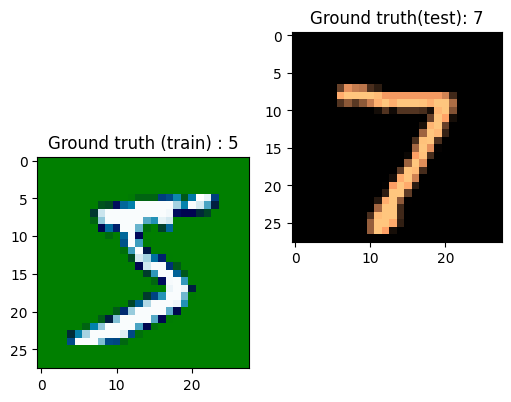

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize =[6,6])

# Display the first image in training data
plt.subplot(121)
plt.imshow(Xtrain[0,:,:], cmap = 'ocean')
plt.title('Ground truth (train) : {}'.format(Ytrain[0]))

# Display the first image in testing data
plt.subplot(222)
plt.imshow(Xtest[0,:,:], cmap ='copper')
plt.title("Ground truth(test): {}".format(Ytest[0]))

In [24]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)

print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [25]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]
Xtest 
 [  0   0   0   0   0   0   0   0 194 254 103   0   0   0   0   0   0   0
   0   0 150 254 213   0   0   0   0   0]
Ytrain 
 3
Ytest 
 0


In [26]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28.
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28.
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [27]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 0.0
Xtest 
 0.0
Ytrain 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


##DNN Model

Using Keras, create the DNN or Sequential Model

In [28]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [29]:
# Layer 1 = input layer
# specify the input size in the first layer.
dnnModel.add(layers.Dense(50, activation='relu', input_shape=(28*28,)))

# Layer 2 = hidden layer
dnnModel.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer
dnnModel.add(layers.Dense(30, activation='relu'))

# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                39250     
                                                                 
 dense_13 (Dense)            (None, 60)                3060      
                                                                 
 dense_14 (Dense)            (None, 30)                1830      
                                                                 
 dense_15 (Dense)            (None, 10)                310       
                                                                 
Total params: 44450 (173.63 KB)
Trainable params: 44450 (173.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
dnnModel_adam = models.Sequential()
dnnModel_adam.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))
dnnModel_adam.add(layers.Dense(60, activation='relu'))
dnnModel_adam.add(layers.Dense(30, activation='relu'))
dnnModel_adam.add(layers.Dense(10, activation='softmax'))
dnnModel_adam.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                39250     
                                                                 
 dense_17 (Dense)            (None, 60)                3060      
                                                                 
 dense_18 (Dense)            (None, 30)                1830      
                                                                 
 dense_19 (Dense)            (None, 10)                310       
                                                                 
Total params: 44450 (173.63 KB)
Trainable params: 44450 (173.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
dnnModel_rmsprop = models.Sequential()
dnnModel_rmsprop.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))
dnnModel_rmsprop.add(layers.Dense(60, activation='relu'))
dnnModel_rmsprop.add(layers.Dense(30, activation='relu'))
dnnModel_rmsprop.add(layers.Dense(10, activation='softmax'))
dnnModel_rmsprop.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                39250     
                                                                 
 dense_21 (Dense)            (None, 60)                3060      
                                                                 
 dense_22 (Dense)            (None, 30)                1830      
                                                                 
 dense_23 (Dense)            (None, 10)                310       
                                                                 
Total params: 44450 (173.63 KB)
Trainable params: 44450 (173.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Regularization and Optimizations of DNN

In [32]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize.
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing.

dnnModel.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnnModel_adam.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnnModel_rmsprop.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'] )

###Train the Model

In [33]:
# train the model

h_sgd  = dnnModel.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)
h_adam  = dnnModel_adam.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)
h_rms  = dnnModel_rmsprop.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)

Epoch 1/25
844/844 [==============================] - 3s 3ms/step - loss: 1.5186 - accuracy: 0.5602 - val_loss: 0.5466 - val_accuracy: 0.8655
Epoch 2/25
844/844 [==============================] - 2s 2ms/step - loss: 0.4728 - accuracy: 0.8697 - val_loss: 0.3219 - val_accuracy: 0.9108
Epoch 3/25
844/844 [==============================] - 2s 2ms/step - loss: 0.3575 - accuracy: 0.8986 - val_loss: 0.2706 - val_accuracy: 0.9240
Epoch 4/25
844/844 [==============================] - 3s 3ms/step - loss: 0.3109 - accuracy: 0.9105 - val_loss: 0.2392 - val_accuracy: 0.9313
Epoch 5/25
844/844 [==============================] - 2s 2ms/step - loss: 0.2779 - accuracy: 0.9204 - val_loss: 0.2205 - val_accuracy: 0.9373
Epoch 6/25
844/844 [==============================] - 2s 2ms/step - loss: 0.2529 - accuracy: 0.9270 - val_loss: 0.1974 - val_accuracy: 0.9420
Epoch 7/25
844/844 [==============================] - 2s 2ms/step - loss: 0.2317 - accuracy: 0.9331 - val_loss: 0.1829 - val_accuracy: 0.9468
Epoch 

In [34]:
print('SGD Final training accuracy', h_sgd.history['accuracy'][-1])
print('Adam Final training accuracy', h_adam.history['accuracy'][-1])
print('RMSProp Final training accuracy', h_rms.history['accuracy'][-1])

SGD Final training accuracy 0.9727222323417664
Adam Final training accuracy 0.996055543422699
RMSProp Final training accuracy 0.9961110949516296


In [35]:
print('SGD Final training loss', h_sgd.history['loss'][-1])
print('Adam Final training loss', h_adam.history['loss'][-1])
print('RMSProp Final training loss', h_rms.history['loss'][-1])

SGD Final training loss 0.09000672399997711
Adam Final training loss 0.012974083423614502
RMSProp Final training loss 0.012529120780527592


###Testing the Model

In [36]:
#testing the model

testLoss_sgd, testAccuracy_sgd = dnnModel.evaluate(Xtest, Ytest)
testLoss_adam, testAccuracy_adam = dnnModel_adam.evaluate(Xtest, Ytest)
testLoss_rms, testAccuracy_rms = dnnModel_rmsprop.evaluate(Xtest, Ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.9728


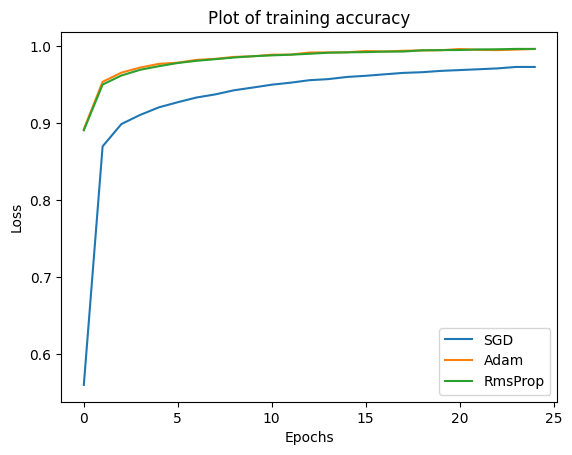

In [37]:
#plot the training accuracy

plt.plot(h_sgd.history['accuracy'], label='SGD')
plt.plot(h_adam.history['accuracy'], label='Adam')
plt.plot(h_rms.history['accuracy'], label='RmsProp')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of training accuracy')
plt.legend()
plt.show()

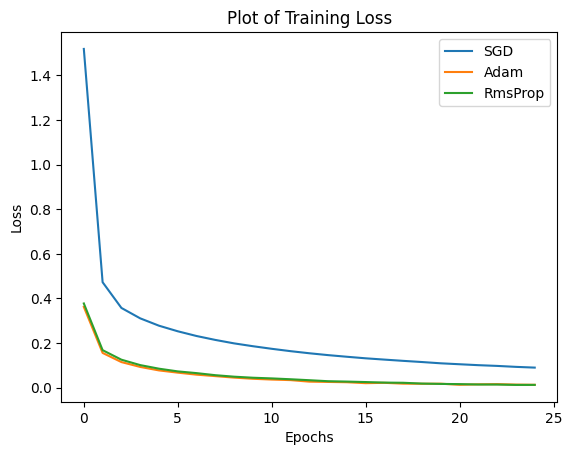

In [38]:
#plot the training loss

plt.plot(h_sgd.history['loss'], label='SGD')
plt.plot(h_adam.history['loss'], label='Adam')
plt.plot(h_rms.history['loss'], label='RmsProp')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

##**Tabular Comparison w.r.t performance metrics**

---
Optimizer    ----       Training Loss    -----------          Training Accuracy


---

SGD       ------------------        0.09138--------------------0.9738
                   
Adam      ----------------         0.01205--------------------0.9961

RMSProp   -----------         0.01369-------------------0.9953


---
Optimizer    ----       Testing Loss    -----------          Testing Accuracy


---

SGD       ------------------        0.1196-------------------- 0.9646
                   
Adam      ----------------        0.1382-------------------- 0.9711

RMSProp   -----------         0.1514-------------------0.9762

#Comparative Analysis



1.   When we compare the optimizers performance w.r.t model training **Adam** and **RMSProp** optimizers are equally good in accuracy and loss metrics.
2.   And if we compare the performance w.r.t model testing **Adam** and **RMSProp** optimizers are very similar to their performance in accuracy and loss metrics.


###Exercise
Modify the code to get a better testing accuracy.

*  Use a different dataset.
*Increase the number of hidden layers.
*Increase the number of neurons in each hidden layers.
*Compare the results of the following optimizers - SGD, Momentum, RMSProp, Adam and plot the results.






In [39]:
# Use the FASHION-MNIST dataset  of Keras.

fashio_mnist = tf.keras.datasets.fashion_mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = fashio_mnist.load_data()

Text(0.5, 1.0, 'Ground Truth (Test): 9')

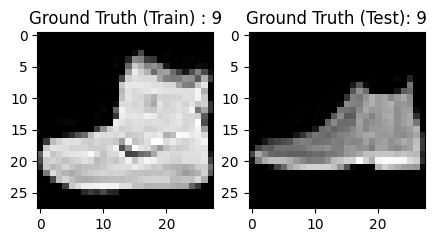

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(Xtrain[0,:,:], cmap='gray')
plt.title("Ground Truth (Train) : {}".format(Ytrain[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(Xtest[0,:,:], cmap='gray')
plt.title("Ground Truth (Test): {}".format(Ytest[0]))

In [41]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [42]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28.
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28.
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [43]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 0.41568628
Xtest 
 0.0
Ytrain 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ytest 
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## DNN Model

Using Keras, create the DNN or Sequential Model

In [52]:
# Create a model object

dnn_Model = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [53]:
# Layer 1 = input layer
# specify the input size in the first layer.
#we have increased the hidden layers as well as the number of neurons from here onwards

dnn_Model.add(layers.Dense(500, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer
dnn_Model.add(layers.Dense(600, activation='relu'))

# Layer 3 = hidden layer
dnn_Model.add(layers.Dense(300, activation='relu'))

# Layer 4 = hidden layer
dnn_Model.add(layers.Dense(100, activation='relu'))

# Layer 5 = hidden layer
dnn_Model.add(layers.Dense(60, activation='relu'))

# Layer 6 = hidden layer
dnn_Model.add(layers.Dense(30, activation='relu'))


# Layer 7 = output layer
dnn_Model.add(layers.Dense(10, activation='softmax'))

dnn_Model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 500)               392500    
                                                                 
 dense_74 (Dense)            (None, 600)               300600    
                                                                 
 dense_75 (Dense)            (None, 300)               180300    
                                                                 
 dense_76 (Dense)            (None, 100)               30100     
                                                                 
 dense_77 (Dense)            (None, 60)                6060      
                                                                 
 dense_78 (Dense)            (None, 30)                1830      
                                                                 
 dense_79 (Dense)            (None, 10)              

In [67]:
#create model for sgd optimizer with momentum

dnn_Model_sgd_m = models.Sequential()
dnn_Model_sgd_m.add(layers.Dense(500, activation='relu', input_shape= (28*28,)))
dnn_Model_sgd_m.add(layers.Dense(600, activation='relu'))
dnn_Model_sgd_m.add(layers.Dense(300, activation='relu'))
dnn_Model_sgd_m.add(layers.Dense(100, activation='relu'))
dnn_Model_sgd_m.add(layers.Dense(60, activation='relu'))
dnn_Model_sgd_m.add(layers.Dense(30, activation='relu'))
dnn_Model_sgd_m.add(layers.Dense(10, activation='softmax'))
dnn_Model_sgd_m.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 500)               392500    
                                                                 
 dense_95 (Dense)            (None, 600)               300600    
                                                                 
 dense_96 (Dense)            (None, 300)               180300    
                                                                 
 dense_97 (Dense)            (None, 100)               30100     
                                                                 
 dense_98 (Dense)            (None, 60)                6060      
                                                                 
 dense_99 (Dense)            (None, 30)                1830      
                                                                 
 dense_100 (Dense)           (None, 10)              

In [54]:
#create model for adam optimizer

dnn_Model_adam = models.Sequential()
dnn_Model_adam.add(layers.Dense(500, activation='relu', input_shape= (28*28,)))
dnn_Model_adam.add(layers.Dense(600, activation='relu'))
dnn_Model_adam.add(layers.Dense(300, activation='relu'))
dnn_Model_adam.add(layers.Dense(100, activation='relu'))
dnn_Model_adam.add(layers.Dense(60, activation='relu'))
dnn_Model_adam.add(layers.Dense(30, activation='relu'))
dnn_Model_adam.add(layers.Dense(10, activation='softmax'))
dnn_Model_adam.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 500)               392500    
                                                                 
 dense_81 (Dense)            (None, 600)               300600    
                                                                 
 dense_82 (Dense)            (None, 300)               180300    
                                                                 
 dense_83 (Dense)            (None, 100)               30100     
                                                                 
 dense_84 (Dense)            (None, 60)                6060      
                                                                 
 dense_85 (Dense)            (None, 30)                1830      
                                                                 
 dense_86 (Dense)            (None, 10)              

In [55]:
#create model for rmsprop optimizer

dnn_Model_rmsprop = models.Sequential()
dnn_Model_rmsprop.add(layers.Dense(500, activation='relu', input_shape= (28*28,)))
dnn_Model_rmsprop.add(layers.Dense(600, activation='relu'))
dnn_Model_rmsprop.add(layers.Dense(300, activation='relu'))
dnn_Model_rmsprop.add(layers.Dense(100, activation='relu'))
dnn_Model_rmsprop.add(layers.Dense(60, activation='relu'))
dnn_Model_rmsprop.add(layers.Dense(30, activation='relu'))
dnn_Model_rmsprop.add(layers.Dense(10, activation='softmax'))
dnn_Model_rmsprop.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 500)               392500    
                                                                 
 dense_88 (Dense)            (None, 600)               300600    
                                                                 
 dense_89 (Dense)            (None, 300)               180300    
                                                                 
 dense_90 (Dense)            (None, 100)               30100     
                                                                 
 dense_91 (Dense)            (None, 60)                6060      
                                                                 
 dense_92 (Dense)            (None, 30)                1830      
                                                                 
 dense_93 (Dense)            (None, 10)              

## Regularization and Optimizations of DNN

In [68]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, momentum, sgd
# loss:  objective that the model will try to minimize.
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing.


dnn_Model.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
sgd = optimizers.SGD(learning_rate =0.01, momentum=0.9, nesterov=True)

dnn_Model_sgd_m.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy']) # sgd with momentum
dnn_Model_adam.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnn_Model_rmsprop.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## Train the Model

In [70]:
# train the model

h_sgd  = dnn_Model.fit(Xtrain, Ytrain, epochs=50, batch_size=64, validation_split=0.1)
h_sgd_m = dnn_Model_sgd_m.fit(Xtrain, Ytrain, epochs=50, batch_size=64, validation_split=0.1)
h_adam  = dnn_Model_adam.fit(Xtrain, Ytrain, epochs=50, batch_size=64, validation_split=0.1)
h_rms  = dnn_Model_rmsprop.fit(Xtrain, Ytrain, epochs=50, batch_size=64, validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 11s 14ms/step - loss: 0.2231 - accuracy: 0.9193 - val_loss: 0.3189 - val_accuracy: 0.8867
Epoch 2/50
844/844 [==============================] - 17s 20ms/step - loss: 0.2188 - accuracy: 0.9194 - val_loss: 0.3067 - val_accuracy: 0.8917
Epoch 3/50
844/844 [==============================] - 11s 13ms/step - loss: 0.2101 - accuracy: 0.9241 - val_loss: 0.3193 - val_accuracy: 0.8893
Epoch 4/50
844/844 [==============================] - 16s 19ms/step - loss: 0.2067 - accuracy: 0.9239 - val_loss: 0.3272 - val_accuracy: 0.8868
Epoch 5/50
844/844 [==============================] - 12s 14ms/step - loss: 0.2011 - accuracy: 0.9257 - val_loss: 0.3224 - val_accuracy: 0.8887
Epoch 6/50
844/844 [==============================] - 12s 14ms/step - loss: 0.1951 - accuracy: 0.9295 - val_loss: 0.3466 - val_accuracy: 0.8822
Epoch 7/50
844/844 [==============================] - 11s 13ms/step - loss: 0.1884 - accuracy: 0.9313 - val_loss: 0.3263 - val_accuracy:

In [80]:
#training accuracy

print('SGD Final training accuracy ', h_sgd.history['accuracy'][-1])
print('SGD with momentum Final training accuracy ', h_sgd_m.history['accuracy'][-1])
print('Adam Final training accuracy ', h_adam.history['accuracy'][-1])
print('RMSProp Final training accuracy ', h_rms.history['accuracy'][-1])

SGD Final training accuracy  0.9819074273109436
SGD with momentum Final training accuracy  0.9669259190559387
Adam Final training accuracy  0.9718518257141113
RMSProp Final training accuracy  0.8599444627761841


In [81]:
#training loss

print('SGD Final training loss ', h_sgd.history['loss'][-1])
print('SGD with momentum Final training loss ', h_sgd_m.history['loss'][-1])
print('Adam Final training loss ', h_adam.history['loss'][-1])
print('RMSProp Final training loss ', h_rms.history['loss'][-1])

SGD Final training loss  0.04996858164668083
SGD with momentum Final training loss  0.09142769128084183
Adam Final training loss  0.07423765957355499
RMSProp Final training loss  0.6626842021942139


## Testing the Model

In [76]:
# testing the model

testLoss_sgd, testAccuracy_sgd = dnn_Model.evaluate( Xtest, Ytest)
testLoss_sgd_m, testAccuracy_sgd_m = dnn_Model_sgd_m.evaluate( Xtest, Ytest)
testLoss_adam, testAccuracy_adam = dnn_Model_adam.evaluate( Xtest, Ytest)
testLoss_rms, testAccuracy_rms = dnn_Model_rmsprop.evaluate( Xtest, Ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.3663 - accuracy: 0.6798


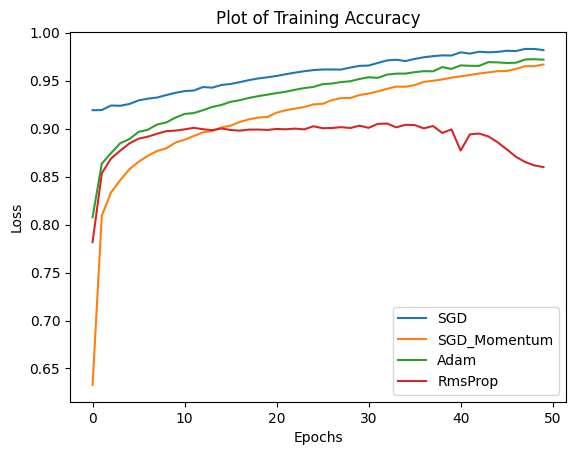

In [82]:
# plot the training accuracy

plt.plot(h_sgd.history['accuracy'], label='SGD')
plt.plot(h_sgd_m.history['accuracy'], label='SGD_Momentum')
plt.plot(h_adam.history['accuracy'], label='Adam')
plt.plot(h_rms.history['accuracy'], label='RmsProp')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

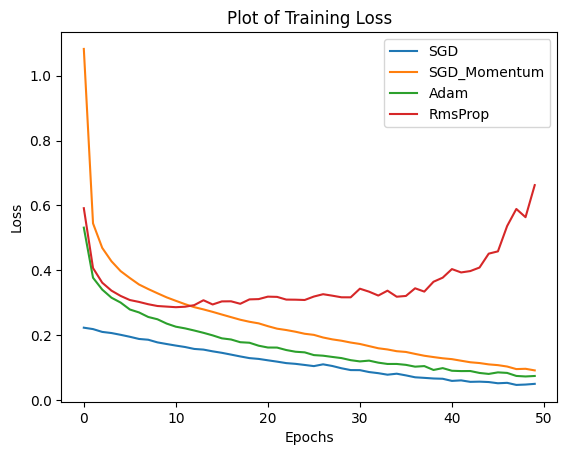

In [83]:
# plot the training loss

plt.plot(h_sgd.history['loss'], label='SGD')
plt.plot(h_sgd_m.history['loss'], label='SGD_Momentum')
plt.plot(h_adam.history['loss'], label='Adam')
plt.plot(h_rms.history['loss'], label='RmsProp')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

##**Tabular Comparison w.r.t performance metrics**

##**Training**

---
Optimizer    ---------------------------       Training Loss    --------------------------          Training Accuracy


---

SGD       -----------------------------------------        0.0499------------------------------------------0.9819

SGD_Momentum----------------------0.0914 ------------------------------------------0.9669
                   
Adam      --------------------------------------         0.0742------------------------------------------0.9718

RMSProp   --------------------------------          0.6626-------------------------------------------0.8599

##**Testing**

---
Optimizer    ---------------------------       Testing Loss    --------------------------          Testing Accuracy


---

SGD       -----------------------------------------        0.5153------------------------------------------ 0.8901

SGD_Momentum----------------------0.3976 ------------------------------------------0.8889
                   
Adam      --------------------------------------         0.6218------------------------------------------0.8890

RMSProp   --------------------------------          1.3663-------------------------------------------0.6798

#Comparative Analysis



##1.   When we compare the optimizers performance w.r.t ***model training***;  **SGD**, **SGD_Momentum** and **Adam** optimizers are equally good in accuracy and loss metrics.

##2.   And if we compare the performance w.r.t ***model testing***; **SGD**, **SGD_Momentum** and **Adam** optimizers are very similar to their performance in accuracy and loss metrics.
